# ***EXPLORATION DATA***

## **POWER BI**

### **Tipe Data Dataset**

Pertama tama kita akan mengentahui terlebih dahulu, kira kira apa tipe data dari setiap kolom yang ada pada dataset yang sudah kita kumpulkan. berikut ini adalah tipe datanya

![tipe-data-table](type-data-table-sneakers.png "Tipe Data Table")

![tipe-data](type-data-sneakers.png "Tipe Data Power BI")



### **Quality Check Data**

Pada power BI kita bisa melihat kualitas dari suatu data. Caranya adalah dengan mengklik tab Transformasi Data. Selanjutnya berikut ini adalah point point yang penulis akan cek. 

-  **Outliers Detection**

    Berikut ini adalah proses pengecekan outliers dengan menggunakan Power BI, dimana saya juga menjalankan script python untuk menampilkan scatter plotnya
    ![outliers-detection-sneakers](outliers-detection-sneakers.png "Outliers Detection")

- **Konsistensi Data** 

    Data bagus, jadi tidak ada data unik pada kolom yang memang datanya adalah klasifikasi. Berikut ini adalah salah satu contoh gambar yang penulis berikan untuk mengecek konsistensi data. Dimana data gender tidak memiliki data unik dan tetap menggunakan 3 data saja antara Men, Women, Unisex
    ![konstistensi-data-sneakers](konsistensi-data-sneakers.png "Konsistensi data")

-  **Missing Value**
    
    Pada dataset yang saya cari dan gunakah tidak ditemukan adanya missing value, bisa terlihat pada gambar yang ada dibawah ini bahwa nilai dari missing valuenya adalah nol. Jadi dataset yang saya gunakan cukup bagus. 

    ![checking-missing-value](checking-missing-value-sneakers.png "Missing Value Check")



## **Python**

### **Koneksi dengan PostgresSQL**

In [1]:
import os
import pandas as pd
from dotenv import load_dotenv
from sqlalchemy import create_engine

In [2]:
load_dotenv()

# Ambil variabel dari .env
db_user = os.getenv("USER_POSTGRES")
db_password = os.getenv("PASS_POSTGRES")
db_host = os.getenv("HOST_POSTGRES")
db_port = os.getenv("PORT_POSTGRES")
db_name = os.getenv("DB_POSTGRES")
    
connection_string = f"postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

postgres_engine = create_engine(connection_string)

python-dotenv could not parse statement starting at line 16
python-dotenv could not parse statement starting at line 19


In [3]:
pg_query = 'SELECT * FROM shoes_sales_cloud'
pg_df = pd.read_sql(pg_query, postgres_engine)

In [4]:
print("Berikut ini adalah dataset yang akan saya gunakan dalam tugas ini: ")
print(pg_df)

Berikut ini adalah dataset yang akan saya gunakan dalam tugas ini: 
           Date                Product Name Product Type       brand  gender  \
0    2022-05-27  Fear of God Essentials Tee      T-shirt  Essentials  Unisex   
1    2022-08-22             Yeezy Boost 350     Sneakers      Adidas  Unisex   
2    2022-04-03               Nike Dunk Low     Sneakers        Nike   Women   
3    2022-07-13            Nike Tech Fleece       Hoodie        Nike     Men   
4    2022-08-25               Jordan 1 High     Sneakers        Nike   Women   
..          ...                         ...          ...         ...     ...   
348  2022-04-08               Jordan 1 High     Sneakers        Nike     Men   
349  2022-08-03            Nike Tech Fleece       Hoodie        Nike   Women   
350  2022-05-05                Puma Joggers      Joggers        Puma   Women   
351  2022-05-19           Adidas Ultraboost     Sneakers      Adidas     Men   
352  2022-07-17               Nike Dunk Low     Snea

In [5]:
df = pg_df.copy()

### **Tipe Data Dataset**

In [6]:
print(type(df['Date'][0]))
print(type(df['Product Name'][0]))
print(type(df['Product Type'][0]))
print(type(df['brand'][0]))
print(type(df['gender'][0]))
print(type(df['country'][0]))
print(type(df['Unit Price ($)'][0]))
print(type(df['Amount ($)'][0]))
print(type(df['Payment Mode'][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>


### **Eksplorasi Data**

#### **Outliers Detection**

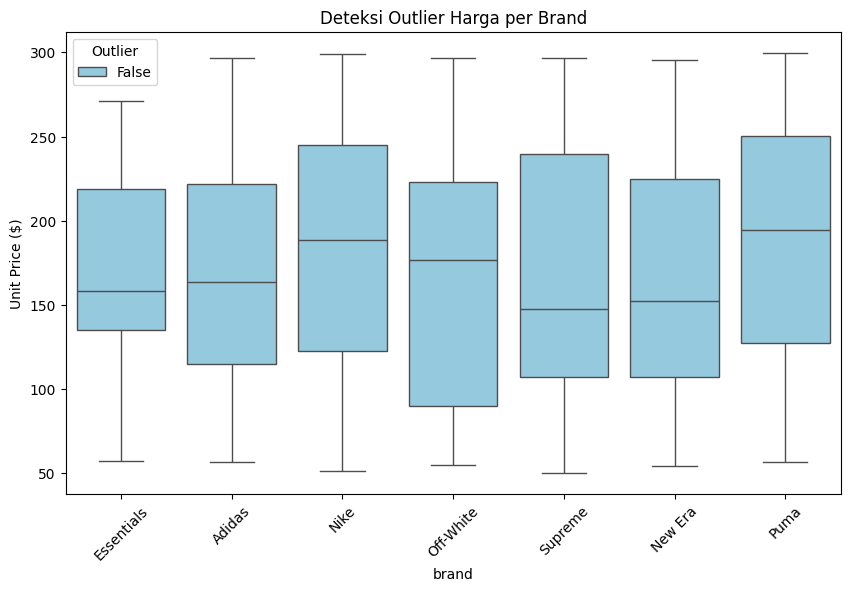

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# hitung IQR
Q1 = df['Unit Price ($)'].quantile(0.25)
Q3 = df['Unit Price ($)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# buat kolom outlier
df['Outlier'] = ((df['Unit Price ($)'] < lower_bound) | 
                 (df['Unit Price ($)'] > upper_bound))

# visualisasi boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='brand', y='Unit Price ($)', hue='Outlier',
            palette={False:"skyblue", True:"red"})
plt.title("Deteksi Outlier Harga per Brand")
plt.xticks(rotation=45)
plt.show()

#### **Konsistensi Data**

In [8]:
# ============================
# Cek format tanggal valid
# ============================
df["valid_date"] = pd.to_datetime(df["Date"], errors="coerce")
invalid_dates = df[df["valid_date"].isna()]

# ============================
# Cek konsistensi kolom Gender
# ============================
valid_genders = ["Men", "Women", "Unisex"]
invalid_genders = df[~df["gender"].isin(valid_genders)]

# ============================
# Cek nilai Quantity
# ============================
invalid_quantity = df[df["quantity"] <= 0]

# ============================
# Cek konsistensi Amount = Quantity * Unit Price
# ============================
df["calc_amount"] = df["quantity"] * df["Unit Price ($)"]
invalid_amount = df[df["calc_amount"].round(2) != df["Amount ($)"].round(2)]

# ============================
# Cek Payment Mode
# ============================
valid_payment = ["Card", "Cash on Delivery", "UPI", "Net Banking", "Wallet"]
invalid_payment = df[~df["Payment Mode"].isin(valid_payment)]

# ============================
# Cek duplikasi data
# ============================
duplicates = df[df.duplicated(keep=False)]

print("=== Data dengan format tanggal tidak valid ===")
print(invalid_dates)

print("\n=== Data dengan gender tidak valid ===")
print(invalid_genders)

print("\n=== Data dengan quantity tidak valid ===")
print(invalid_quantity)

print("\n=== Data dengan amount tidak konsisten ===")
print(invalid_amount)

print("\n=== Data dengan payment mode tidak valid ===")
print(invalid_payment)

print("\n=== Data duplikat ===")
print(duplicates)

=== Data dengan format tanggal tidak valid ===
Empty DataFrame
Columns: [Date, Product Name, Product Type, brand, gender, category, country, quantity, Unit Price ($), Amount ($), Payment Mode, Outlier, valid_date]
Index: []

=== Data dengan gender tidak valid ===
Empty DataFrame
Columns: [Date, Product Name, Product Type, brand, gender, category, country, quantity, Unit Price ($), Amount ($), Payment Mode, Outlier, valid_date]
Index: []

=== Data dengan quantity tidak valid ===
Empty DataFrame
Columns: [Date, Product Name, Product Type, brand, gender, category, country, quantity, Unit Price ($), Amount ($), Payment Mode, Outlier, valid_date]
Index: []

=== Data dengan amount tidak konsisten ===
Empty DataFrame
Columns: [Date, Product Name, Product Type, brand, gender, category, country, quantity, Unit Price ($), Amount ($), Payment Mode, Outlier, valid_date, calc_amount]
Index: []

=== Data dengan payment mode tidak valid ===
Empty DataFrame
Columns: [Date, Product Name, Product Type, 

#### **Missing Value**

In [9]:
print("Jumlah missing value per kolom:")
print(df.isnull().sum(), "\n")

missing_percentage = df.isnull().mean() * 100
print("Persentase missing value per kolom:")
print(missing_percentage, "\n")


Jumlah missing value per kolom:
Date              0
Product Name      0
Product Type      0
brand             0
gender            0
category          0
country           0
quantity          0
Unit Price ($)    0
Amount ($)        0
Payment Mode      0
Outlier           0
valid_date        0
calc_amount       0
dtype: int64 

Persentase missing value per kolom:
Date              0.0
Product Name      0.0
Product Type      0.0
brand             0.0
gender            0.0
category          0.0
country           0.0
quantity          0.0
Unit Price ($)    0.0
Amount ($)        0.0
Payment Mode      0.0
Outlier           0.0
valid_date        0.0
calc_amount       0.0
dtype: float64 

